In [76]:
import json
import requests
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt

In [83]:
def roundTime(dt=None, roundTo=60):
   """Round a datetime object to any time lapse in seconds
   dt : datetime.datetime object, default now.
   roundTo : Closest number of seconds to round to, default 1 minute.
   Author: Thierry Husson 2012 - Use it as you want but don't blame me.
   """
   if dt == None : dt = dt.datetime.now()
   seconds = (dt.replace(tzinfo=None) - dt.min).seconds
   rounding = (seconds+roundTo/2) // roundTo * roundTo
   return dt + dt.timedelta(0,rounding-seconds,-dt.microsecond)

In [80]:
def GetHistPrices(symbol, interval, startTime, endTime):

    url = "https://api.binance.com/api/v3/klines"
 
    # startTime = str(int(startTime.timestamp() * 1000))
    # endTime = str(int(endTime.timestamp() * 1000))
    startTime = str(startTime).split(sep='.')[0]
    endTime = str(endTime).split(sep='.')[0]
    print(str(startTime).split(sep='.')[0], str(endTime).split(sep='.')[0])

    par = {'symbol': symbol, 'interval': interval, 'startTime': startTime, 'endTime': endTime}

    data = pd.DataFrame(json.loads(requests.get(url, params=par).text))

    #format columns name
    data.columns = ['time', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
    data = data[["time", "close", "volume"]]
    data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.time]
    data[['close', 'volume']]=data[['close', 'volume']].astype(float)
    data['volume'] = data['volume'].astype(int) # Man kann Volume nicht direkt als int interpretieren.
    data['time'] = data['time'].apply(lambda x: dt.datetime.fromtimestamp(x / 1e3))
    return data

In [65]:
df_tweets = pd.read_csv("../../Data/QMEF/tweet_analysis.csv", sep=";", encoding='utf8', parse_dates=['CreatedAt', 'UTC'], index_col='TweetId')
df_tweets['Date'] = df_tweets['UTC'].dt.date
# df_tweets.drop_duplicates('TweetId', inplace = True)
df_tweets = df_tweets.loc[(df_tweets['Favorites'] >= 100_000) & (df_tweets['Retweets'] >= 50_000)]
# df_tweets = df_tweets.merge(df_doge, left_on='Date', right_on='Date')
# df_tweets[['Text', 'Favorites', 'Retweets', 'Date', 'Volume', 'Mean_Price', 'neg', 'neu', 'pos', 'compound']]
df_tweets

,Text,Name,ScreenName,UTC,CreatedAt,Favorites,Retweets,Language,Client,TweetType,...,Mentions,MediaType,MediaURLs,neg,pos,neu,compound,crypto related,year,Date
TweetId,,,,,,,,,,,,,,,,,,,,,
1359519541219500033,"Bought some Dogecoin for lil X, so he can be a...",Elon Musk,elonmusk,2021-02-10 15:08:11+00:00,2021-02-10 15:08:11+00:00,548940,59215,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,...,0,NaN,,0.000,0.000,1.000,0.0000,True,2021,2021-02-10
1387290679794089986,The Dogefather SNL May 8,Elon Musk,elonmusk,2021-04-28 06:20:47+00:00,2021-04-28 06:20:47+00:00,465278,80539,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,...,0,NaN,,0.000,0.000,1.000,0.0000,True,2021,2021-04-28
1392030108274159619,Do you want Tesla to accept Doge?,Elon Musk,elonmusk,2021-05-11 08:13:35+00:00,2021-05-11 08:13:35+00:00,386790,98651,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,...,0,NaN,,0.000,0.438,0.562,0.4404,True,2021,2021-05-11
1392974251011895300,Working with Doge devs to improve system trans...,Elon Musk,elonmusk,2021-05-13 22:45:16+00:00,2021-05-13 22:45:16+00:00,512735,84083,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,...,0,NaN,,0.000,0.503,0.497,0.7964,True,2021,2021-05-13
1357244295091208193,"No highs, no lows, only Doge",Elon Musk,elonmusk,2021-02-04 08:27:10+00:00,2021-02-04 08:27:10+00:00,773919,113814,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,...,0,NaN,,0.253,0.401,0.346,0.0721,True,2021,2021-02-04
1357241340313141249,Dogecoin is the people’s crypto,Elon Musk,elonmusk,2021-02-04 08:15:26+00:00,2021-02-04 08:15:26+00:00,554302,103909,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,...,0,NaN,,0.000,0.000,1.000,0.0000,True,2021,2021-02-04
1382552587099062272,Doge Barking at the Moon https://t.co/QFB81D7zOL,Elon Musk,elonmusk,2021-04-15 04:33:18+00:00,2021-04-15 04:33:18+00:00,336465,50802,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,...,0,photo,https://pbs.twimg.com/media/Ey_QPDlWQAIFuJy.jpg,0.000,0.000,1.000,0.0000,True,2021,2021-04-15
1377567762919292938,SpaceX is going to put a literal Dogecoin on t...,Elon Musk,elonmusk,2021-04-01 10:25:23+00:00,2021-04-01 10:25:23+00:00,547562,53429,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,...,0,NaN,,0.000,0.000,1.000,0.0000,True,2021,2021-04-01
1391523807148527620,SpaceX launching satellite Doge-1 to the moon ...,Elon Musk,elonmusk,2021-05-09 22:41:43+00:00,2021-05-09 22:41:43+00:00,537909,118943,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,...,0,NaN,,0.000,0.000,1.000,0.0000,True,2021,2021-05-09


1612958891000 1612980491000


Text(0, 0.5, '$ Price')

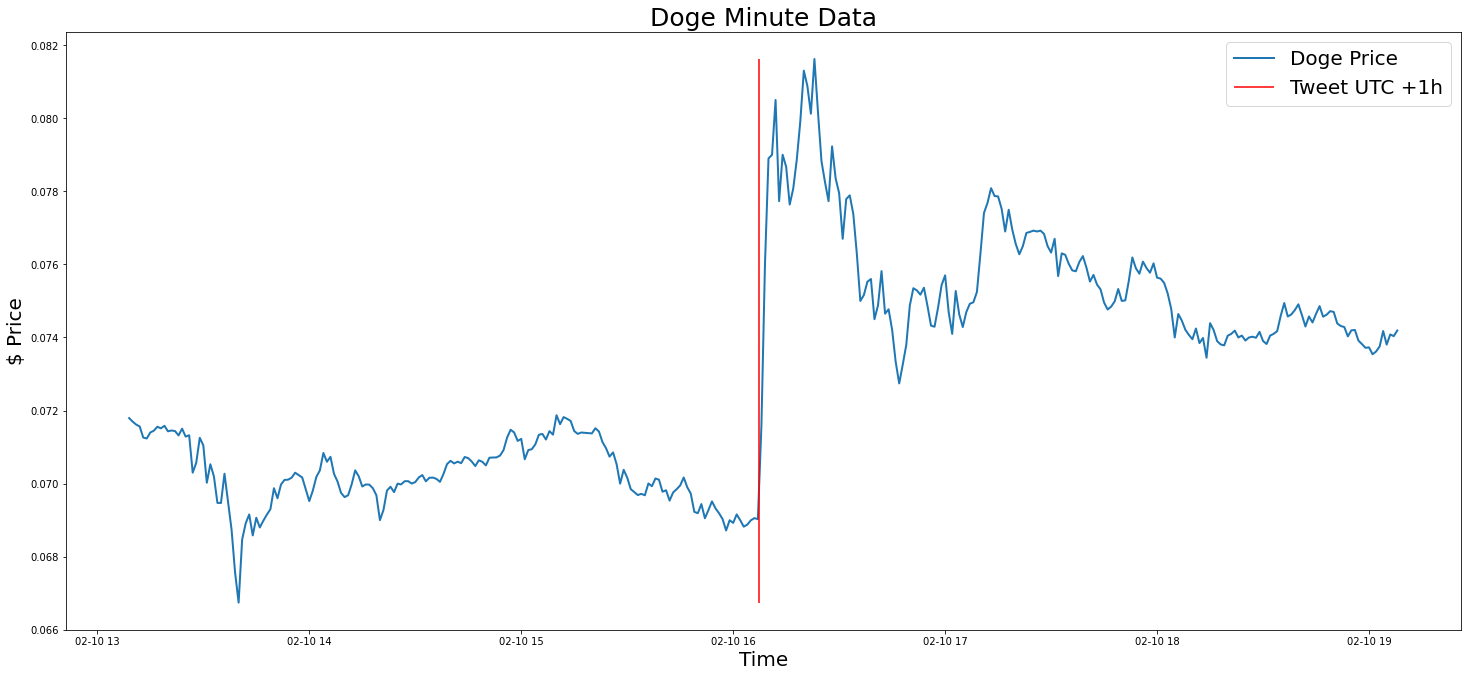

In [110]:
tweet = df_tweets.iloc[0]
s_time = (tweet['UTC'] - dt.timedelta(hours=3)).timestamp() * 1000
e_time = (tweet['UTC'] + dt.timedelta(hours=3)).timestamp() * 1000
min_price = GetHistPrices("DOGEUSDT",interval ='1m', startTime = s_time, endTime= e_time).reset_index()[['time', 'close','volume']]

plt.figure(figsize = (25, 11))
plt.plot(min_price["time"], min_price["close"], lw=2, label="Doge Price")
#plt.vlines(tweet['UTC'], label='Tweet UTC', ymin=min_price['close'].min(), ymax=min_price['close'].max(), colors='green')
plt.vlines(tweet['UTC'] + dt.timedelta(minutes=59), label='Tweet UTC +1h', ymin=min_price['close'].min(), ymax=min_price['close'].max(), colors='red')
plt.legend(loc='best', fontsize=20)
plt.title("Doge Minute Data", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

1619580047000 1619601647000


Text(0, 0.5, '$ Price')

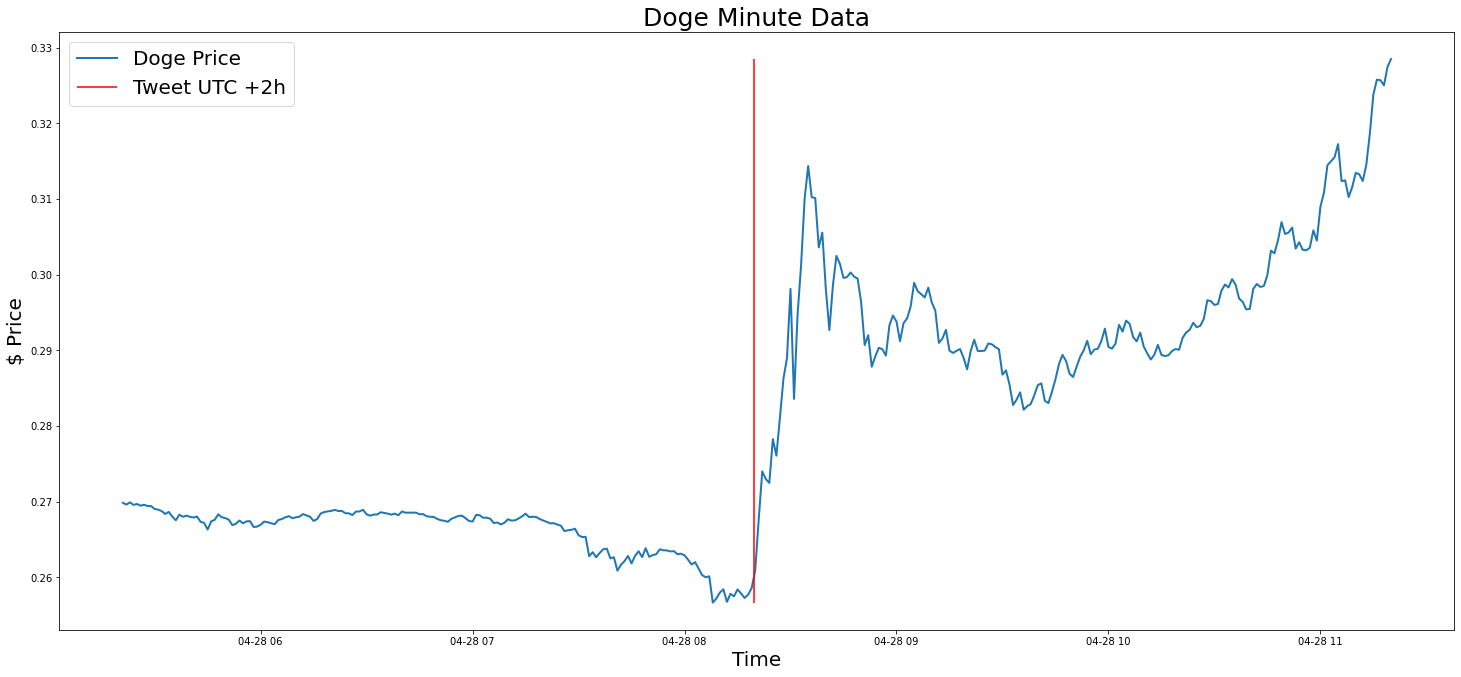

In [111]:
tweet = df_tweets.iloc[1]
s_time = (tweet['UTC'] - dt.timedelta(hours=3)).timestamp() * 1000
e_time = (tweet['UTC'] + dt.timedelta(hours=3)).timestamp() * 1000
min_price = GetHistPrices("DOGEUSDT",interval ='1m', startTime = s_time, endTime= e_time).reset_index()[['time', 'close','volume']]

plt.figure(figsize = (25, 11))
plt.plot(min_price["time"], min_price["close"], lw=2, label="Doge Price")
#plt.vlines(tweet['UTC'], label='Tweet UTC', ymin=min_price['close'].min(), ymax=min_price['close'].max(), colors='green')
plt.vlines(tweet['UTC'] + dt.timedelta(minutes=119), label='Tweet UTC +2h', ymin=min_price['close'].min(), ymax=min_price['close'].max(), colors='red')
plt.legend(loc='best', fontsize=20)
plt.title("Doge Minute Data", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

1620710015000 1620731615000


Text(0, 0.5, '$ Price')

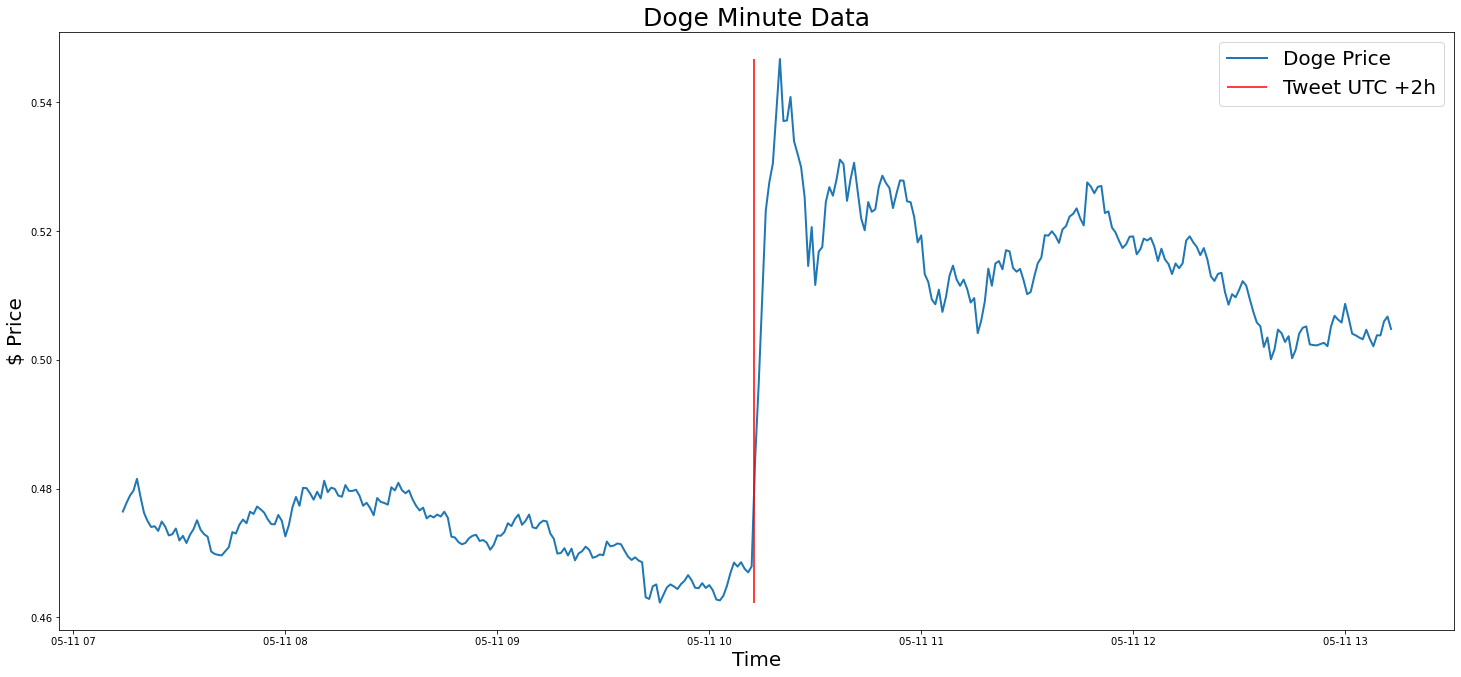

In [130]:
tweet = df_tweets.iloc[2]
s_time = (tweet['UTC'] - dt.timedelta(hours=3)).timestamp() * 1000
e_time = (tweet['UTC'] + dt.timedelta(hours=3)).timestamp() * 1000
min_price = GetHistPrices("DOGEUSDT",interval ='1m', startTime = s_time, endTime= e_time).reset_index()[['time', 'close','volume']]

plt.figure(figsize = (25, 11))
plt.plot(min_price["time"], min_price["close"], lw=2, label="Doge Price")
#plt.vlines(tweet['UTC'], label='Tweet UTC', ymin=min_price['close'].min(), ymax=min_price['close'].max(), colors='green')
plt.vlines(tweet['UTC'] + dt.timedelta(minutes=119), label='Tweet UTC +2h', ymin=min_price['close'].min(), ymax=min_price['close'].max(), colors='red')
plt.legend(loc='best', fontsize=20)
plt.title("Doge Minute Data", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)